## 2022.09.01.(목)


## 머신러닝 종류

---
[답 존재 여부]
- 지도 학습
- 비지도 학습
- 특성

[분류 vs 회귀]  
- 분류 : 범주 -> 다수결로 결과 도출  
- 회귀 : 수치 -> 평균으로 결과 도출  

**머신러닝에 정답은 정해져 있지 않아서 여러 방식을 시도해봐야 한다.**  

- 선형 회귀
- 다항 회귀
- 로지스틱 회귀
    - 신경망 딥러닝의 기초가 됨.
    - S자 형태 
    - 이름은 회귀지만 사실상 분류임.
    - $ Y = ax + b $ 사용한 뒤 0,1로 결과를 도출해야함. 


## Scikit-learn ML 기본 동작
---
**1) 데이터 수집 & 준비단계** 

**2) 데이터 전처리**
- 데이터 / 타겟 분리
- 데이터 표준화 / 정규화
- 타겟(라벨) 인코딩

**3) 학습을 위한 데이터 준비**
  - 데이터셋  
    - 학습용 데이터셋 => 학습에 사용  
    - 검증용 데이터셋 => 모델 생성 중에 사용  
    - 테스트용 데이터셋 => 모델 완성 후 사용 

**4) 학습 모델 생성**
  - 학습 방법 선정 및 모델 객체 생성  
  - 학습 진행  
    * 모델 파라미터 최적화 => 학스베 의해서 결정되는 파라미터
    * 예) W 가중치, b 절편
  - 모델 평가
    * 성능 개선 => 하이퍼파라미터 (모델마다 다름) => 모델 튜닝
    * 예) KNN -> K, 학습 횟수, 학습크기(배치 사이즈), 규제 값들

**5) 모델 테스트**
  - 학습에 사용되지 않은 데이터
  - 새로운 데이터 테스트 진행

## MachineLearning Basic 
---

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### [1] 데이터 준비

In [17]:
# 시간, 점수
X=[2,4,6,8,10,12]
Y=[40,50,60,70,80,90]

##### [2] 데이터 분포 분석 => EDA => 시각화

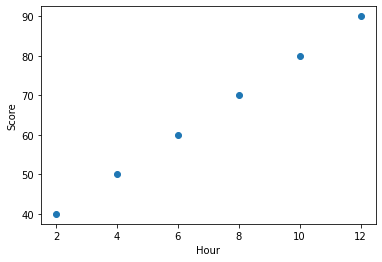

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

- 시간과 점수는 비례관계  
- 선형의 데이터 분포  
- 독립변수 => hour  
- 종속변수 => score  

##### [3] 학습 방법 선택 및 모델 생성

In [19]:
import pandas as pd

df = pd.DataFrame({'Hour' : X, 'Socre': Y})
df.shape

(6, 2)

In [20]:
# X값을 2차원 배열로 변환
import numpy as np

arrX= np.array(X)
arrY= np.array(Y)
print( 'arrX:', arrX.shape)

arrX = arrX.reshape(-1,1)
print( 'arrX:', arrX.shape)

arrX: (6,)
arrX: (6, 1)


In [21]:
# 모델 객체 생성
model = LinearRegression()

# 학습 ==> 트레이닝 데이터 사용
# fit 메서드 ==> x값은 2차원 데이터를 사용해야 함.
model.fit(arrX,arrY)

# 모델 파라미터 => w 가중치, b절편
print('w:', model.coef_, 'b:', model.intercept_)


w: [5.] b: 30.0


##### [4] 모델 평가

테스트(검증) 데이터로 평가
score()
  * 분류 : 정답 --- 예측답 => 맞춘 정도
    - **정확도(accuracy)**
  * 회귀 : 정답 --- 예측답 => 차이 오차(Error)
    - 손실함수(Loss/Cost Function): MSE, MAE, RMSE 낮을수록 좋음
    - **R2 계수 : 0~ 1 높을수록 좋음**

In [22]:
# 회귀 => 결정계수 R^2 반환
model.score(arrX,arrY)

1.0

In [23]:
# 오차 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error

preY = model.predict(arrX)
mae = mean_absolute_error(arrY, preY)
mse = mean_squared_error(arrY, preY)

print(mae,mse)

0.0 0.0


## 실습 : taxi_regression 
- 과제(조건 뉴욕시 내)
    - 거리에 따른 요금 예측 => 회귀 
    - 승차에 따른 하자지역 예측 => 분류
--- 

In [1]:
# 모듈설치
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# 파일 불러오기
df = pd.read_csv('./train.csv', nrows = 5000, parse_dates =['pickup_datetime'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [22]:
# 결측지 확인
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance             0
dtype: int64

**특성 새롭게 생성 => 거리 Feature**
- 공식 : ((x2-x1)^2 + (y2-y1)^2 )^(1/2)

In [19]:
x1 = df['pickup_longitude']
y1 = df['pickup_latitude']
x2 = df['dropoff_longitude']
y2 = df['dropoff_latitude']
df['distance'] = ((x2-x1)**2 + (y2-y1)**2)**(1/2)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470


## 실습: Scikit-learn Dataset 사용
---
- 종류  
    * load_dataset():sckit

In [5]:
# 모듈 로딩 
from sklearn.datasets import load_diabetes


In [6]:
# 당뇨병 유무 => 8개 특성 + 1개 라벨
data = load_diabetes()
print('1.data type :', type(data))
print('2.data keys :',data.keys())

1.data type : <class 'sklearn.utils._bunch.Bunch'>
2.data keys : dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [8]:
# dict에서 key로 value 접근
data['target'] 

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## LogisticRegression
- 인공 신명강의 기본 개념과 동일
- Regression이지만 이진분류로 사용
- 선형모델 기반으로 y = wx+b 그래프 사용
- y = wx+b 결과 => 분류 변화 함수 => sigmoid()

## 실습 : 성적 - 합격/불합격 분류 
---

In [9]:
# 사용 모듈 로딩
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np


**(1) 데이터 준비**

In [17]:
X = [78, 89, 91, 94, 97] # 점수
Y = [0,0,1,1,1]          # 합격여부 ( 합격: 1, 불합격: 0)

In [19]:
# 학습에 사용할 수 있도록 형변환
arrX = np.array(X).reshape(-1,1)
arrY = np.array(Y)

In [20]:
# 배열 체크
print('arrX:', arrX.shape, 'arrY:', arrY.shape)

arrX: (5, 1) arrY: (5,)


**(2) 데이터 확인 => 시각화**

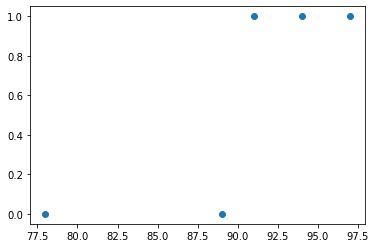

In [22]:
plt.scatter(arrX,arrY)
plt.show()

**(3)모델 생성 & 학습**
 

In [23]:
model = LogisticRegression()

#학습
model.fit(arrX,arrY)

LogisticRegression()

In [26]:
# 학습 후 설정된 속성
print("분류 종류 : ", model.classes_)
print("가중치 값 : ", model.coef_)
print("절  편 값 : ", model.intercept_)
print("특성 갯수 : ", model.n_features_in_)

분류 종류 :  [0 1]
가중치 값 :  [[0.79462221]]
절  편 값 :  [-71.42274648]
특성 갯수 :  1


##### [4] 평가 => score() 학습용 데이터 점수, 테스트용 데이터 점수
- 2개 점수 비교해서 과대적합, 과소적합 체크

In [27]:
model.score(arrX, arrY)

1.0

##### [5] 테스트 => predict(): 새로운 데이터로 진행


In [29]:
# 1개 데이터
preY = model.predict([[87]])

print('예측결과:', preY)

예측결과: [0]


In [31]:
probaY = model.predict_proba([[87]])
print('분류항목:', model.classes_)
print('예측확률:', probaY)

분류항목: [0 1]
예측확률: [[0.90809675 0.09190325]]


In [32]:
# 결정함수
model.decision_function([[82]])

array([-6.26372553])

In [33]:
# y = Wx + b
result = (model.coef_*82) + model.intercept_
print('result:', result)

result: [[-6.26372553]]


# 실습 : IRIS Dataset 활용 분류
---

In [2]:
# 모듈로딩
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np


##### [1] 데이터 로딩 및 확인

In [3]:
data, target = load_iris(as_frame = True, return_X_y = True)
type(iris), type(iris[0]), type(iris[1])


NameError: name 'iris' is not defined

In [ ]:
print(data.info(), data.head(3), sep ='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2


In [ ]:
print(target.head(3), target.unique(), target.value_counts(),sep='\n\n')

0    0
1    0
2    0
Name: target, dtype: int64

[0 1 2]

0    50
1    50
2    50
Name: target, dtype: int64


[2] 학습 데이터 준비

In [4]:
# 데이터 => petal_length(cm), petal_width(cm)
# 타  겟 => 0, 2
data = data.iloc[:,2:]
print('data=>', data.shape)

data=> (150, 2)


In [5]:
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [6]:
arr_data = np.array(data)
arr_target =np.array(target)
print(arr_data.shape)
print(arr_target.shape)

(150, 2)
(150,)


In [7]:
# train,test 나누기 
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split( arr_data, arr_target, test_size= 0.2,stratify = target, random_state=42)

In [8]:
model = LogisticRegression()
model.fit(train_input,train_target)

LogisticRegression()

In [9]:
# 학습 후 설정된 속성
print("분류 종류 : ", model.classes_)
print("가중치 값 : \n", model.coef_)
print("절  편 값 : ", model.intercept_)
print("특성 갯수 : ", model.n_features_in_)

분류 종류 :  [0 1 2]
가중치 값 : 
 [[-2.57480323 -1.08787617]
 [ 0.11136326 -0.84266177]
 [ 2.46343997  1.93053794]]
절  편 값 :  [ 10.41582694   2.8335323  -13.24935924]
특성 갯수 :  2


In [10]:
preY = model.predict([[1.5,0.3]])

print('예측결과:', preY)

예측결과: [0]


In [11]:
probaY = model.predict_proba([[1.5,0.3]])
print('분류항목:', model.classes_)
print('예측확률:', probaY)

# 결정함수
print('결정함수:',model.decision_function([[1.5,0.3]]))


분류항목: [0 1 2]
예측확률: [[9.70098022e-01 2.99017358e-02 2.42405160e-07]]
결정함수: [[ 6.22725924  2.74777865 -8.9750379 ]]


In [12]:
print('trainset 점수:', model.score(train_input,train_target))
print('testset 점수 :' ,model.score(test_input,test_target))

trainset 점수: 0.9666666666666667
testset 점수 : 0.9666666666666667


In [13]:
print(model.coef_,model.intercept_)

[[-2.57480323 -1.08787617]
 [ 0.11136326 -0.84266177]
 [ 2.46343997  1.93053794]] [ 10.41582694   2.8335323  -13.24935924]


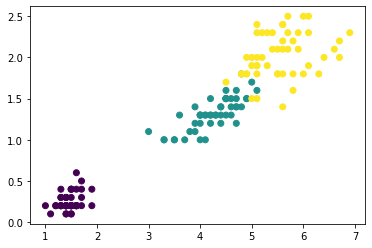

In [14]:
plt.scatter(data['petal length (cm)'],data['petal width (cm)'],c = target)
plt.show()

In [15]:
model.predict([[6,0.5]])

array([1])

##### 시그모이드 함수 그리기

In [16]:
target_50 = target[50:]
target_50

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 100, dtype: int64

In [29]:
data_50

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [65]:
data, target = load_iris(as_frame = True, return_X_y = True)

[[3.37903632]] [-16.50154754]


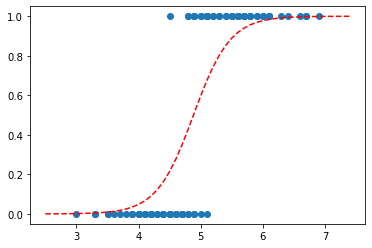

In [66]:
data_50 = data.iloc[50:,:]
target_50 = target[:100]

data_length = data_50['petal length (cm)']

data_length = np.array(data_length).reshape(-1,1)
target_50 = np.array(target_50)

train_input, test_input, train_target, test_target = train_test_split(
    data_length, target_50, random_state = 42)

model = LogisticRegression()
model.fit(train_input,train_target)

print(model.coef_,model.intercept_)

def sigmoid(X):
    return 1/(1+np.exp(-X))

x = np.arange(2.5,7.5,0.1).reshape(-1,1)
#X = model.coef_*x + model.intercept_
y = sigmoid(model.coef_*x + model.intercept_)
y = np.array(y)
plt.scatter(data_length, target_50)  
plt.plot(x,y, c='red', linestyle = '--')  
plt.show()
